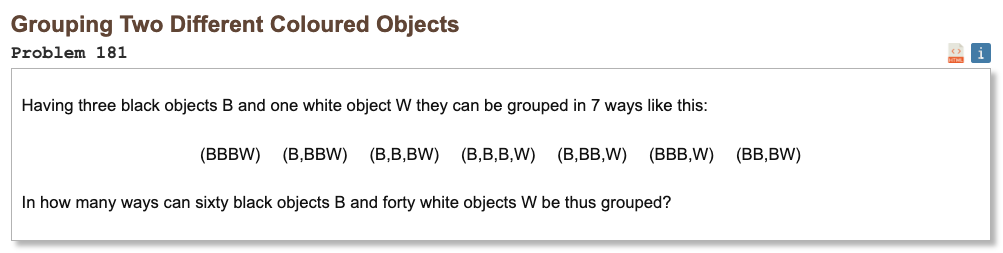

## Initial approach

* write fₙ(x,y,z) and factor it into (x + y + z) · (xⁿ + yⁿ − zⁿ), so fₙ = 0 means xⁿ + yⁿ = zⁿ
* argue that this equation in rationals only works for n = 1, 2, −1, −2, all other n give no solutions
* turn these four n values into simple formulas for z in terms of x and y
* build a list R of all reduced fractions a/b with 0 < a < b ≤ 35
* for every pair (x, y) from R, compute z using each formula and keep the triples where z is also in R
* for the cases with squares, use exact rational math and integer square roots to check if z is valid
* for each good triple, compute s = x + y + z, keep all different s values, and add them up as one big fraction t = u/v
* output u + v in the end

In [1]:
from fractions import Fraction
from math import gcd, isqrt

def build_rationals(limit):
    values = set()
    for b in range(2, limit + 1):
        for a in range(1, b):
            if gcd(a, b) == 1:
                values.add(Fraction(a, b))
    return sorted(values)

def compute_sum(limit):
    rationals = build_rationals(limit)
    lookup = {r: True for r in rationals}
    sums = set()

    for x in rationals:
        for y in rationals:
            z = x + y
            if z in lookup:
                sums.add(x + y + z)

    for x in rationals:
        x2 = x * x
        for y in rationals:
            s = x2 + y * y
            num = s.numerator
            den = s.denominator
            rn = isqrt(num)
            rd = isqrt(den)
            if rn * rn == num and rd * rd == den:
                z = Fraction(rn, rd)
                if z in lookup:
                    sums.add(x + y + z)

    for x in rationals:
        for y in rationals:
            z = x * y / (x + y)
            if z in lookup:
                sums.add(x + y + z)

    for x in rationals:
        x2 = x * x
        for y in rationals:
            y2 = y * y
            s = x2 + y2
            val = x2 * y2 / s
            num = val.numerator
            den = val.denominator
            rn = isqrt(num)
            rd = isqrt(den)
            if rn * rn == num and rd * rd == den:
                z = Fraction(rn, rd)
                if z in lookup:
                    sums.add(x + y + z)

    total = Fraction(0, 1)
    for s in sums:
        total += s

    return total.numerator + total.denominator

result = compute_sum(35)
print("Result:", result)

Result: 285196020571078987
